In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

api = KaggleApi()
api.authenticate()
api.dataset_download_file('thedevastator/cancer-patients-and-air-pollution-a-new-link','cancer patient data sets.csv', path='./')
df = pd.read_csv('cancer%20patient%20data%20sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [2]:
df_anna = df[['Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Level']]
display(df_anna.head())
display(df_anna.describe())
display(df_anna.isnull().sum())

,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Level
0,2,4,3,4,Low
1,2,3,1,3,Medium
2,4,8,8,7,High
3,7,8,4,2,High
4,7,9,3,2,High


,Chest Pain,Coughing of Blood,Fatigue,Weight Loss
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.438000,4.859000,3.856000,3.855000
std,2.280209,2.427965,2.244616,2.206546
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000
75%,7.000000,7.000000,5.000000,6.000000
max,9.000000,9.000000,9.000000,8.000000


Chest Pain           0
Coughing of Blood    0
Fatigue              0
Weight Loss          0
Level                0
dtype: int64

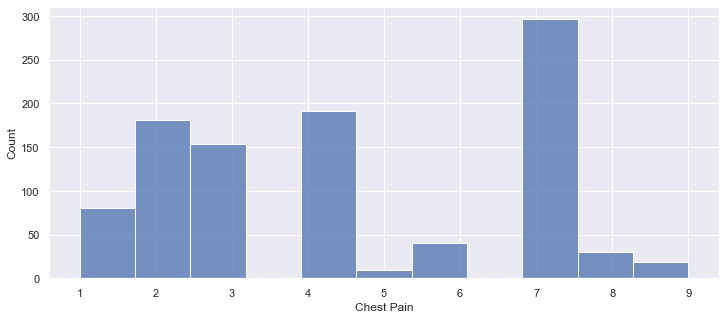

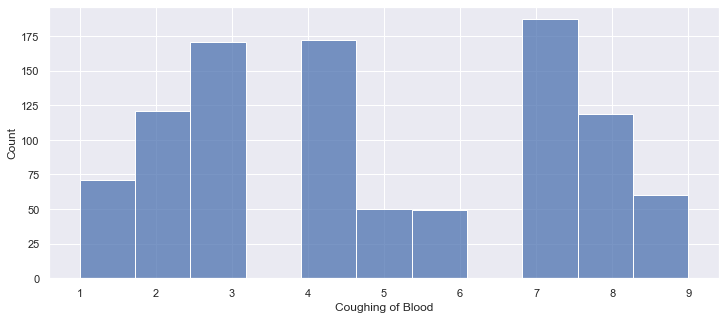

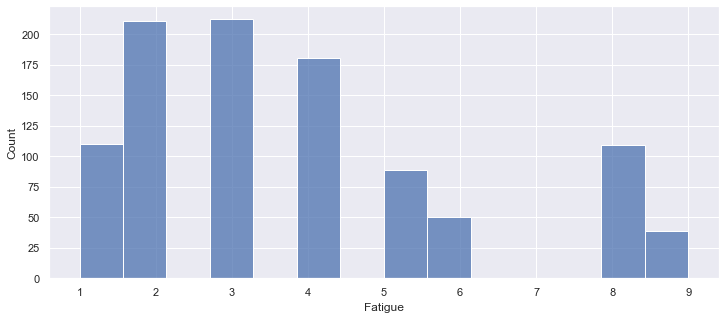

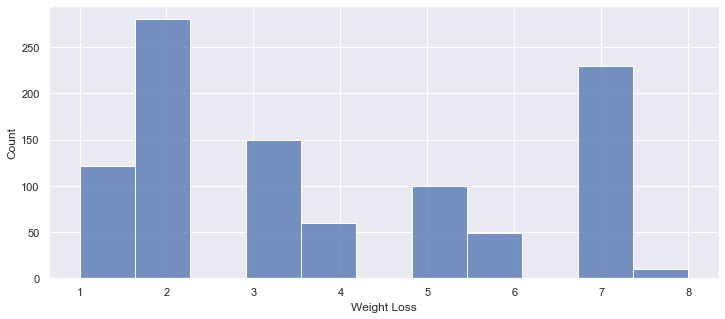

In [3]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_anna['Chest Pain'], kde=False)
plt.show()
sns.histplot(df_anna['Coughing of Blood'], kde=False)
plt.show()
sns.histplot(df_anna['Fatigue'], kde=False)
plt.show()
sns.histplot(df_anna['Weight Loss'], kde=False)
plt.show()

<AxesSubplot:xlabel='Chest Pain'>

<AxesSubplot:xlabel='Coughing of Blood'>

<AxesSubplot:xlabel='Fatigue'>

<AxesSubplot:xlabel='Weight Loss'>

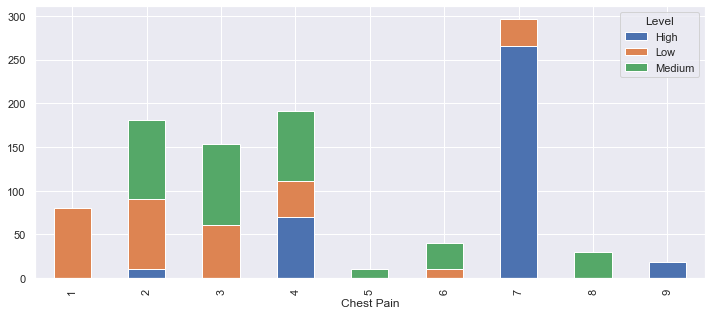

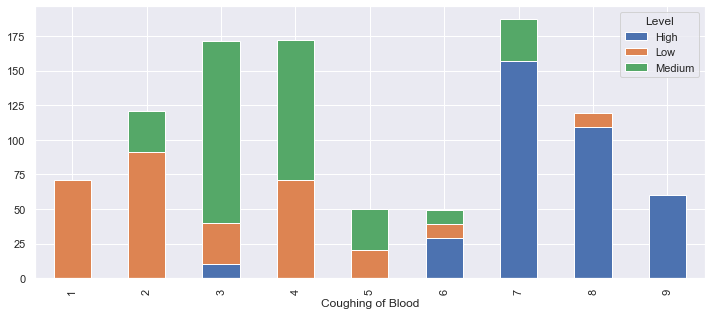

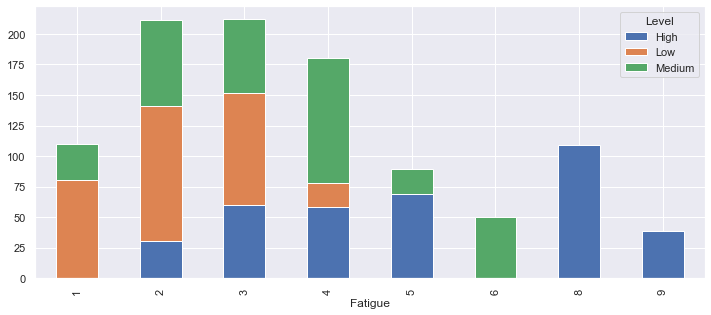

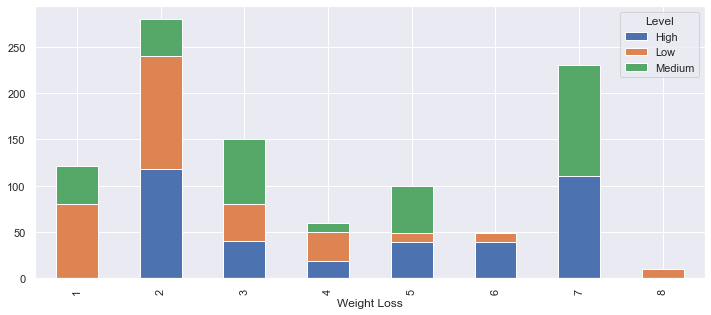

In [4]:
abin_df = df[['Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Level']]
df_chestpain = abin_df.groupby('Chest Pain')['Level'].value_counts().unstack()
display(df_chestpain.plot(kind='bar', stacked=True))
df_coughingblood = abin_df.groupby('Coughing of Blood')['Level'].value_counts().unstack()
display(df_coughingblood.plot(kind='bar', stacked=True))
df_fatigue = abin_df.groupby('Fatigue')['Level'].value_counts().unstack()
display(df_fatigue.plot(kind='bar', stacked=True))
df_weightloss = abin_df.groupby('Weight Loss')['Level'].value_counts().unstack()
display(df_weightloss.plot(kind='bar', stacked=True))

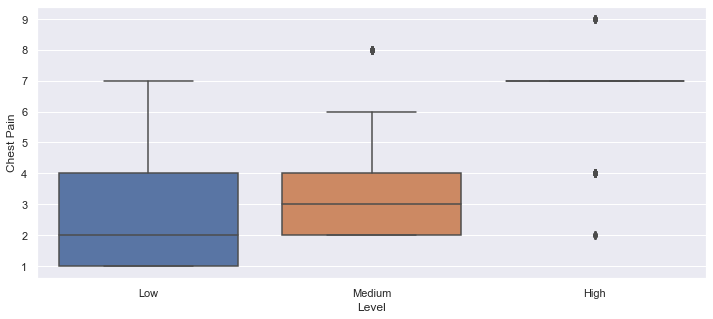

In [5]:
sns.boxplot(x='Level', y='Chest Pain', data=df_anna)
plt.show()

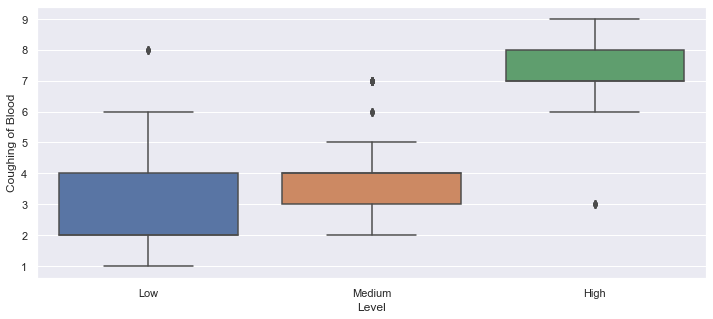

In [6]:
sns.boxplot(x='Level', y='Coughing of Blood', data=df_anna)
plt.show()

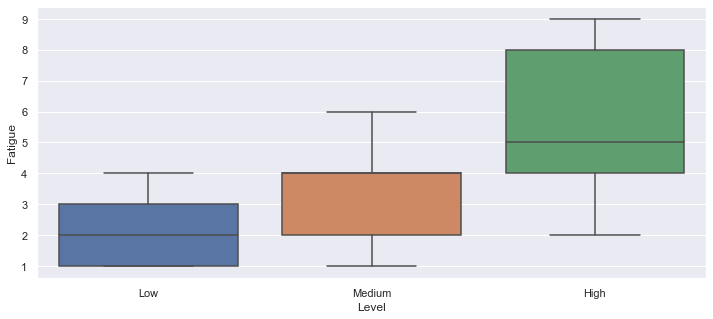

In [7]:
sns.boxplot(x='Level', y='Fatigue', data=df_anna)
plt.show()

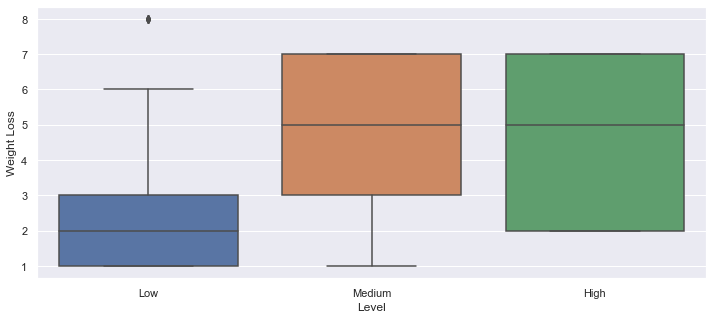

In [8]:
sns.boxplot(x='Level', y='Weight Loss', data=df_anna)
plt.show()

In [9]:
df_anna['Level'] = pd.factorize(df_anna['Level'])[0] + 1
display(df_anna.head())

C:\Users\annam\AppData\Local\Temp\ipykernel_8068\233436566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anna['Level'] = pd.factorize(df_anna['Level'])[0] + 1


,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Level
0,2,4,3,4,1
1,2,3,1,3,2
2,4,8,8,7,3
3,7,8,4,2,3
4,7,9,3,2,3


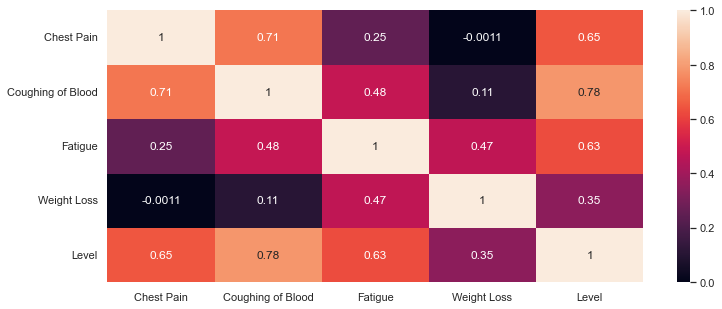

In [10]:
corr1 = df_anna.corr()
sns.heatmap(corr1, annot=True)
plt.show()